In [ ]:
%pip install wfdb
# %pip install PyWavelets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 KB 12.6 MB/s eta 0:00:00
  Attempting uninstall: SoundFile
    Found existing installation: soundfile 0.12.1
    Uninstalling soundfile-0.12.1:
      Successfully uninstalled soundfile-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.


In [ ]:
%pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 8.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import wfdb
import glob
from wfdb import processing
import pywt
from scipy import stats
import scipy
from scipy import *
sns.set()

In [ ]:
data_files = glob.glob('/content/sample_data/mit-bih/*.atr')
data_files = [i[:-4] for i in data_files] #storing record without any file extension
data_files.sort()
print(data_files)

['/content/sample_data/mit-bih/100', '/content/sample_data/mit-bih/101', '/content/sample_data/mit-bih/102', '/content/sample_data/mit-bih/103', '/content/sample_data/mit-bih/104', '/content/sample_data/mit-bih/105', '/content/sample_data/mit-bih/106', '/content/sample_data/mit-bih/107', '/content/sample_data/mit-bih/108', '/content/sample_data/mit-bih/109', '/content/sample_data/mit-bih/111', '/content/sample_data/mit-bih/112', '/content/sample_data/mit-bih/113', '/content/sample_data/mit-bih/114', '/content/sample_data/mit-bih/115', '/content/sample_data/mit-bih/116', '/content/sample_data/mit-bih/117', '/content/sample_data/mit-bih/118', '/content/sample_data/mit-bih/119', '/content/sample_data/mit-bih/121', '/content/sample_data/mit-bih/122', '/content/sample_data/mit-bih/123', '/content/sample_data/mit-bih/124', '/content/sample_data/mit-bih/200', '/content/sample_data/mit-bih/201', '/content/sample_data/mit-bih/202', '/content/sample_data/mit-bih/203', '/content/sample_data/mit-b

{'N': 75052, 'A': 2546, 'V': 7130, 'Q': 33, '/': 7028, 'f': 982, 'F': 803, 'j': 229, 'L': 8075, 'a': 150, 'J': 83, 'R': 7259, 'E': 106, 'S': 2, 'e': 16}


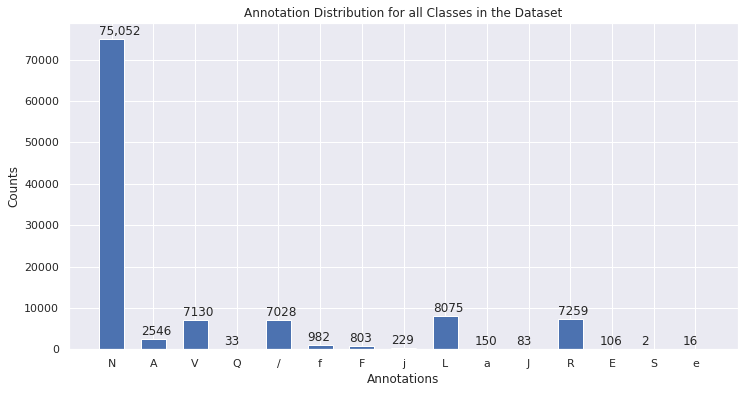

In [ ]:
import wfdb as wf
import numpy as np
import glob
from matplotlib import pyplot as plt
from biosppy.signals import ecg
from scipy import signal

def extract_data():
    data_files = glob.glob('/content/sample_data/mit-bih/*.atr')
    data_files = [i[:-4] for i in data_files]
    data_files.sort()
    return data_files

files = extract_data()
i=0

good_beats =['N','L','R','B','A','a','J','S','V','r',
             'F','e','j','n','E','/','f','Q','?']
list_anns = []

for i in range(len(files)):
    datfile = files[i]
    record = wf.rdsamp(datfile)
    ann = wf.rdann(datfile, 'atr')
    list_anns.extend(ann.symbol)

dict_anns = {}

for i in list_anns:
    dict_anns[i] = dict_anns.get(i,0)+1
    
dict_anns = {k:v for k,v in dict_anns.items() if k in good_beats}

print(dict_anns)
# print(dict_anns.values())

plt.figure(figsize=(12,6))

xlocs, xlabs = plt.xticks()
barplt = plt.bar(list(dict_anns.keys()),dict_anns.values(),width = .6)
xlocs = [j for j in dict_anns.keys()]
ylabs = [j for j in dict_anns.values()]

plt.title('Annotation Distribution for all Classes in the Dataset')
plt.xlabel('Annotations')
plt.ylabel('Counts')
# figure, ax = plt.subplots()
# bar_container = ax.bar(dict_anns.keys(),dict_anns.values())
# ax.set(ylabel='pints sold', title='Gelato sales by flavor', ylim=(0, 8000))
# ax.bar_label(bar_container, fmt='{:,.0f}')
for bar in barplt:
    yval = bar.get_height()
    # yval2=str(yval)
    if yval>9999:
       yval2='{:,}'.format(yval)
       plt.text(bar.get_x(), yval+1000, yval2)
    else:
      plt.text(bar.get_x(), yval+1000, yval)
    
    
plt.show()

In [ ]:
def denoise(data): 
    w = pywt.Wavelet('db10')
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    threshold = 0.03 # Threshold for filtering

    coeffs = pywt.wavedec(data, 'db10', level=maxlev)
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
        
    datarec = pywt.waverec(coeffs, 'db10')
    
    return datarec

In [ ]:
import wfdb as wf
import numpy as np
import glob
from matplotlib import pyplot as plt
from biosppy.signals import ecg
from scipy import signal

def extract_data():
    data_files = glob.glob('/content/sample_data/mit-bih/*.atr')
    data_files = [i[:-4] for i in data_files]
    data_files.sort()
    return data_files

records = extract_data()
print('Total files: ', len(records))


good_beats = ['N','L','R','B','A','a','J','S','V','r',
             'F','e','j','n','E','/','f','Q','?']

for path in records:
    pathpts = path.split('/')
    fn = pathpts[-1]
    print('Loading file:', path)

    # Read in the data
    record = wf.rdsamp(path) #signals and fields
    annotation = wf.rdann(path, 'atr')

    # Print some meta informations
    print('    Sampling frequency used for this record:', record[1].get('fs'))
    print('    Shape of loaded data array:', record[0].shape)
    print('    Number of loaded annotations:', len(annotation.num))
    
    # Get the ECG values from the file.
    data = record[0].transpose() #record[0] indicates signal attribute

    # Generate the classifications based on the annotations.
    # 0.0 = undetermined
    # 1.0 = normal
    # 2.0 = LBBBB
    # 3.0 = RBBBB
    # 4.0 = Premature Ventricular contraction
    # 5.0 = Atrial Premature beat
    # 6.0 = Fusion ventricular normal beat
    # 7.0 = Fusion of paced and normal beat
    # 8.0 = paced beat
    
    clas = np.array(annotation.symbol)
    rate = np.zeros_like(clas, dtype='float')
    for clasid, clasval in enumerate(clas):
        if (clasval == 'N'):
            rate[clasid] = 0.0 # Normal
        elif (clasval == 'L'):
            rate[clasid] = 0.0 # LBBBB
        elif (clasval == 'R'):
            rate[clasid] = 0.0 # RBBBB
        elif (clasval == 'V'):
            rate[clasid] = 3.0 # Premature Ventricular contraction
        elif (clasval == 'E'):
            rate[clasid] = 3.0 # Premature Ventricular contraction
        elif (clasval == 'e'):
            rate[clasid] = 1.0 # Premature Ventricular contraction
        elif (clasval == 'j'):
            rate[clasid] = 1.0 # Premature Ventricular contraction
        elif (clasval == 'A'):
            rate[clasid] = 1.0 # Premature Ventricular contraction
        elif (clasval == 'J'):
            rate[clasid] = 1.0 # Premature Ventricular contraction
        elif (clasval == 'S'):
            rate[clasid] = 1.0 # Premature Ventricular contraction
        elif (clasval == 'a'):
            rate[clasid] = 1.0 # Premature Ventricular contraction
        
        elif (clasval == 'F'):
            rate[clasid] = 2.0 # Fusion ventricular normal beat
        elif (clasval == 'f'):
            rate[clasid] = 4.0 # Fusion of paced and normal beat
        elif (clasval == '/'):
            rate[clasid] = 4.0 # paced beat
        elif (clasval == 'Q'):
            rate[clasid] = 4.0 # paced beat
        # print(rate)  
        

    rates = np.zeros_like(data[0], dtype='float')
    rates[annotation.sample] = rate
    
    indices = np.arange(data[0].size, dtype='int')

    # Manipulate both channels
    for channelid, channel in enumerate(data):
        chname = record[1].get('sig_name')[channelid]
        print('    ECG channel type:', chname)
        
        # Find rpeaks in the ECG data. Most should match with
        # the annotations.
        out = ecg.ecg(signal=channel, sampling_rate=360, show=False)

        # Split into individual heartbeats. For each heartbeat
        # record, append classification.
        
        beats = []
        for ind, ind_val in enumerate(out['rpeaks']):

            start,end = ind_val-360//2, ind_val+360//2
            if start < 0:
                start = 0
            diff = 360 - len(channel[start:end])
            if diff > 0:
                padding = np.zeros(diff, dtype='float')
                padded_channel = np.append(padding, channel[start:end])
                padded_channel=denoise(padded_channel)
                beats.append(padded_channel)
            else:
                value=denoise(channel[start:end])
                beats.append(value)

            # Get the classification value that is on
            # or near the position of the rpeak index.
            from_ind = 0 if ind_val < 10 else ind_val - 10
            to_ind = ind_val + 10
            clasval = rates[from_ind:to_ind].max()
            
            
            # Standardize the data
            beats[ind] = ((beats[ind] - np.mean(beats[ind])) / np.std(beats[ind]))
            

            # Append the classification to the beat data.
            beats[ind] = np.append(beats[ind], clasval)
            
            # Append the record number to the beat data.
            beats[ind] = np.append(beats[ind], fn[-3:])

        # Save to CSV file.

        savedata = np.array(beats[:], dtype=np.float)
        outfn = '/content/sample_data/mit-bih/'+fn+'_'+chname+'.csv'
        print('    Generating ', outfn)
        with open(outfn, "wb") as fin:
            np.savetxt(fin, savedata, delimiter=",", fmt='%f')

Total files:  48
Loading file: /content/sample_data/mit-bih/100
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2274
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/100_MLII.csv
    ECG channel type: V5
    Generating  /content/sample_data/mit-bih/100_V5.csv
Loading file: /content/sample_data/mit-bih/101
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1874
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/101_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/101_V1.csv
Loading file: /content/sample_data/mit-bih/102
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2192
    ECG channel type: V5


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/102_V5.csv
    ECG channel type: V2
    Generating  /content/sample_data/mit-bih/102_V2.csv
Loading file: /content/sample_data/mit-bih/103
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2091
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/103_MLII.csv
    ECG channel type: V2
    Generating  /content/sample_data/mit-bih/103_V2.csv
Loading file: /content/sample_data/mit-bih/104
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2311
    ECG channel type: V5


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/104_V5.csv
    ECG channel type: V2
    Generating  /content/sample_data/mit-bih/104_V2.csv
Loading file: /content/sample_data/mit-bih/105
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2691
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/105_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/105_V1.csv
Loading file: /content/sample_data/mit-bih/106
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2098
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/106_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/106_V1.csv
Loading file: /content/sample_data/mit-bih/107
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2140
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/107_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/107_V1.csv
Loading file: /content/sample_data/mit-bih/108
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1824
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/108_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/108_V1.csv
Loading file: /content/sample_data/mit-bih/109
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2535
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/109_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/109_V1.csv
Loading file: /content/sample_data/mit-bih/111
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2133
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/111_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/111_V1.csv
Loading file: /content/sample_data/mit-bih/112
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2550
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/112_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/112_V1.csv
Loading file: /content/sample_data/mit-bih/113
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1796
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/113_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/113_V1.csv
Loading file: /content/sample_data/mit-bih/114
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1890
    ECG channel type: V5


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/114_V5.csv
    ECG channel type: MLII
    Generating  /content/sample_data/mit-bih/114_MLII.csv
Loading file: /content/sample_data/mit-bih/115
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1962
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/115_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/115_V1.csv
Loading file: /content/sample_data/mit-bih/116
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2421
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/116_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/116_V1.csv
Loading file: /content/sample_data/mit-bih/117
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1539
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/117_MLII.csv
    ECG channel type: V2
    Generating  /content/sample_data/mit-bih/117_V2.csv
Loading file: /content/sample_data/mit-bih/118
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2301
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/118_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/118_V1.csv
Loading file: /content/sample_data/mit-bih/119
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2094
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/119_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/119_V1.csv
Loading file: /content/sample_data/mit-bih/121
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1876
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/121_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/121_V1.csv
Loading file: /content/sample_data/mit-bih/122
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2479
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/122_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/122_V1.csv
Loading file: /content/sample_data/mit-bih/123
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1519
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/123_MLII.csv
    ECG channel type: V5
    Generating  /content/sample_data/mit-bih/123_V5.csv
Loading file: /content/sample_data/mit-bih/124
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1634
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/124_MLII.csv
    ECG channel type: V4
    Generating  /content/sample_data/mit-bih/124_V4.csv
Loading file: /content/sample_data/mit-bih/200
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2792
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/200_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/200_V1.csv
Loading file: /content/sample_data/mit-bih/201
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2039
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/201_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/201_V1.csv
Loading file: /content/sample_data/mit-bih/202
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2146
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/202_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/202_V1.csv
Loading file: /content/sample_data/mit-bih/203
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 3108
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/203_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/203_V1.csv
Loading file: /content/sample_data/mit-bih/205
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2672
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/205_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/205_V1.csv
Loading file: /content/sample_data/mit-bih/207
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2385
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/207_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/207_V1.csv
Loading file: /content/sample_data/mit-bih/208
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 3040
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/208_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/208_V1.csv
Loading file: /content/sample_data/mit-bih/209
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 3052
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/209_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/209_V1.csv
Loading file: /content/sample_data/mit-bih/210
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2685
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/210_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/210_V1.csv
Loading file: /content/sample_data/mit-bih/212
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2763
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/212_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/212_V1.csv
Loading file: /content/sample_data/mit-bih/213
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 3294
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/213_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/213_V1.csv
Loading file: /content/sample_data/mit-bih/214
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2297
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/214_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/214_V1.csv
Loading file: /content/sample_data/mit-bih/215
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 3400
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/215_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/215_V1.csv
Loading file: /content/sample_data/mit-bih/217
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2280
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/217_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/217_V1.csv
Loading file: /content/sample_data/mit-bih/219
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2312
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/219_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/219_V1.csv
Loading file: /content/sample_data/mit-bih/220
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2069
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/220_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/220_V1.csv
Loading file: /content/sample_data/mit-bih/221
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2462
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/221_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/221_V1.csv
Loading file: /content/sample_data/mit-bih/222
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2634
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/222_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/222_V1.csv
Loading file: /content/sample_data/mit-bih/223
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2643
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/223_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/223_V1.csv
Loading file: /content/sample_data/mit-bih/228
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2141
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/228_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/228_V1.csv
Loading file: /content/sample_data/mit-bih/230
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2466
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/230_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/230_V1.csv
Loading file: /content/sample_data/mit-bih/231
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2011
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/231_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/231_V1.csv
Loading file: /content/sample_data/mit-bih/232
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 1816
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/232_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/232_V1.csv
Loading file: /content/sample_data/mit-bih/233
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 3152
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/233_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/233_V1.csv
Loading file: /content/sample_data/mit-bih/234
    Sampling frequency used for this record: 360
    Shape of loaded data array: (650000, 2)
    Number of loaded annotations: 2764
    ECG channel type: MLII


<ipython-input-31-1a0c02c408ea>:138: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  savedata = np.array(beats[:], dtype=np.float)


    Generating  /content/sample_data/mit-bih/234_MLII.csv
    ECG channel type: V1
    Generating  /content/sample_data/mit-bih/234_V1.csv


In [ ]:
#storing all data 
alldata = np.empty(shape=[0, 362])
print(alldata.shape)
all_csvs = glob.glob('/content/sample_data/mit-bih/*.csv')
print(all_csvs)
for j in all_csvs:
    
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    alldata = np.append(alldata, csvrows, axis=0)
    
print(alldata.shape)

(0, 362)
['/content/sample_data/mit-bih/219_V1.csv', '/content/sample_data/mit-bih/114_MLII.csv', '/content/sample_data/mit-bih/108_V1.csv', '/content/sample_data/mit-bih/108_MLII.csv', '/content/sample_data/mit-bih/123_MLII.csv', '/content/sample_data/mit-bih/205_MLII.csv', '/content/sample_data/mit-bih/119_V1.csv', '/content/sample_data/mit-bih/118_MLII.csv', '/content/sample_data/mit-bih/123_V5.csv', '/content/sample_data/mit-bih/101_V1.csv', '/content/sample_data/mit-bih/111_MLII.csv', '/content/sample_data/mit-bih/113_MLII.csv', '/content/sample_data/mit-bih/232_MLII.csv', '/content/sample_data/mit-bih/201_MLII.csv', '/content/sample_data/mit-bih/215_MLII.csv', '/content/sample_data/mit-bih/116_V1.csv', '/content/sample_data/mit-bih/220_V1.csv', '/content/sample_data/mit-bih/101_MLII.csv', '/content/sample_data/mit-bih/117_MLII.csv', '/content/sample_data/mit-bih/213_V1.csv', '/content/sample_data/mit-bih/112_V1.csv', '/content/sample_data/mit-bih/219_MLII.csv', '/content/sample_d

In [ ]:
# print(alldata.shape)

from sklearn.model_selection import train_test_split
train, test = train_test_split(alldata,test_size=0.20,random_state=48)

print(train.shape)
print(test.shape)

(172288, 362)
(43073, 362)


In [ ]:
with open('/content/sample_data/mit-bih/all_data.csv', "wb") as fin:
    np.savetxt(fin, alldata, delimiter=",", fmt='%f')

In [ ]:
with open('/content/sample_data/mit-bih/train_unsampled_all.csv', "wb") as fin:
    np.savetxt(fin, train, delimiter=",", fmt='%f')

In [ ]:
with open('/content/sample_data/mit-bih/test_unsampled_all.csv', "wb") as fin:
    np.savetxt(fin, test, delimiter=",", fmt='%f')

In [ ]:
from sklearn.utils import resample

N = train[train[:,-2]==0.0]
S = train[train[:,-2]==1.0]
F = train[train[:,-2]==2.0]
V = train[train[:,-2]==3.0]


Q = train[train[:,-2]==4.0]


seed=42
np.random.seed(seed)
def downsample(arr, n, seed):
    downsampled = resample(arr,replace=False,n_samples=n, random_state=seed)
    return downsampled

def upsample(arr, n, seed):
    upsampled = resample(arr,replace=True,n_samples=n,random_state=seed)
    return upsampled

all_class = [N,S,F,V,Q]
abn_class = [N,S,F,V,Q]

mean_val = np.mean([len(i) for i in abn_class], dtype= int)
train_sampled = []

for i in all_class:
    if i.shape[0]> mean_val:
        i = downsample(i,mean_val,seed)
    elif i.shape[0]< mean_val:
        i = upsample(i, mean_val,seed)
    train_sampled.append(i)
    
train_sampled = np.concatenate(train_sampled)
np.random.shuffle(train_sampled)
train_sampled_all = train_sampled
print(train_sampled_all.shape)
with open('/content/sample_data/mit-bih/train_sampled_all.csv', "wb") as fin:
    np.savetxt(fin, train_sampled_all, delimiter=",", fmt='%f')

(172285, 362)


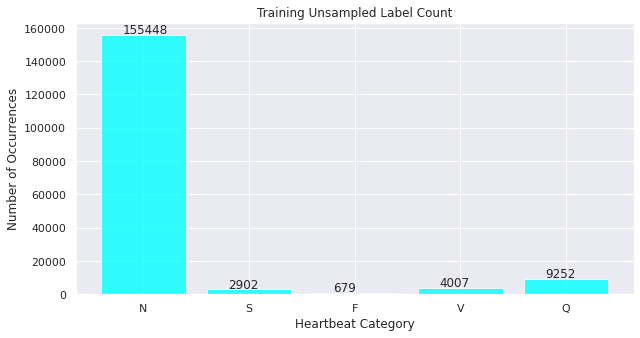

AttributeError: ignored

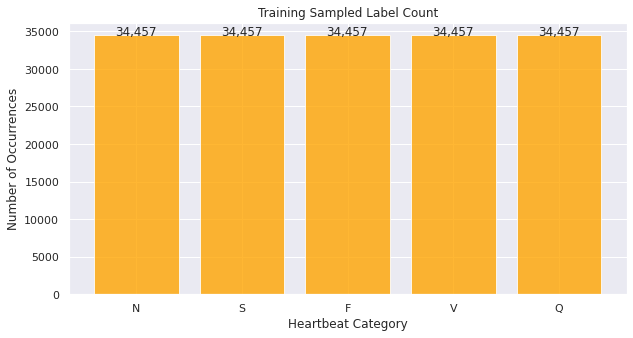

In [ ]:
feature_names = ['N','S','F','V','Q']

dftrain = pd.DataFrame(train)
countstrain = dftrain[360].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(countstrain.index, countstrain.values, alpha=0.8, color='cyan')
plt.title('Training Unsampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Heartbeat Category', fontsize=12)
plt.xticks(ticks=[0,1,2,3,4],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval+1000, yval)
plt.show()

df_sampled = pd.DataFrame(train_sampled_all)
counts = df_sampled[360].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(counts.index, counts.values, alpha=0.8, color='orange')
plt.title('Training Sampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Heartbeat Category', fontsize=12)

plt.xticks(ticks=[0,1,2,3,4],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    if yval>9999:
       yval2='{:,}'.format(yval)
       plt.text(bar.get_x()+.2, yval+30, yval2)
    else:
      plt.text(bar.get_x()+.2, yval+30, yval)
ax=plt.plot()
ax.yaxis.set_major_formatter(plt.ticker.StrMethodFormatter('{x:,.0f}'))    
plt.show()

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *



train_values = np.empty(shape=[0, 362])
test_values = np.empty(shape=[0, 362])

train_sampled_all = glob.glob('/content/sample_data/mit-bih/train_sampled_all.csv')
test_unsampled_all = glob.glob('/content/sample_data/mit-bih/test_unsampled_all.csv')


for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)

for j in test_unsampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

Loading  /content/sample_data/mit-bih/train_sampled_all.csv
Loading  /content/sample_data/mit-bih/test_unsampled_all.csv
(172285, 362)
(43073, 362)


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss

sns.set()

In [ ]:
X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

y_train = train_values[:,-2]
y_test = test_values[:,-2]
print(X_train.shape)
print(y_train.shape)

(172285, 360)
(172285,)


In [ ]:
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test1 = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)

(172285, 360, 1)
(43073, 360, 1)
(172285, 5)


In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add, MaxPool1D,ZeroPadding1D, LSTM
from keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import regularizers
from keras.models import Sequential, Model


In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    conv1 = inputs
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=14, padding="same",activation="relu")(conv1)
    # conv1 = keras.layers.BatchNormalization()(conv1)
    conv2 = keras.layers.Conv1D(filters=32, kernel_size=10, padding="same",activation="relu")(conv1)
    # conv2 = keras.layers.BatchNormalization()(conv2)
    conv3 = keras.layers.Conv1D(filters=16, kernel_size=10, padding="same",activation="relu")(conv2)
    # conv3 = keras.layers.BatchNormalization()(conv3)
    x=conv3
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    
    cnn_trans=x
    input_layer=inputs
    y=input_layer
    y=(layers.Bidirectional(LSTM(128,return_sequences=True)))(y)
    y=(layers.Bidirectional(LSTM(128, return_sequences=True)))(y)

    # y=layers.MaxPooling1D(2)(y)
    y=(layers.Dense(352, activation='relu'))(y)
    y=(layers.Dense(100, activation='relu'))(y)
    y=(layers.Dense(32, activation='relu'))(y)


    y=layers.GlobalAveragePooling1D()(y)
    blstm_out=y
    merge=layers.concatenate([cnn_trans,blstm_out])

    z=merge
    # z = layers.Dense(352, activation="relu")(z)
    # z = layers.Dense(100, activation="relu")(z)
    # z = layers.Dense(32, activation="relu")(z)
    outputs = layers.Dense(5, activation="softmax")(z)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = (X_train1.shape[1:])
print(input_shape)

model = build_model(
    input_shape,
    head_size=256,
    num_heads=8,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[1012],
    mlp_dropout=0,
    dropout=0.15,
)
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
model.compile(
    loss="categorical_crossentropy",
    # optimizer=keras.optimizers.Adam(learning_rate=1e-6),
    optimizer="adam",
    metrics=["accuracy"]
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True),
keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_accuracy"
),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.000001
    )
    ]


# model.evaluate(test_x, test_y, verbose=1)

(360, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 360, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 360, 64)      960         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 360, 32)      20512       ['conv1d[0][0]']                 
                                                                                                  
 conv1d_2 (Conv1D)              (None, 360, 16)      5136        ['conv1d_1[0][0]']               
                                                                                     

In [ ]:
history_new=model.fit(
    X_train1,
    y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    callbacks=callbacks,
   
)


Epoch 1/5
1551/2154 [====================>.........] - ETA: 6:28 - loss: 0.3223 - accuracy: 0.8861

In [ ]:
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('Proposed Framework')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('cusModelloss.png')
plt.show()


In [ ]:
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('Proposed Framework')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('CustModelAcc.png')
plt.show()

In [ ]:
model = keras.models.load_model("best_model.h5")

In [ ]:
test_loss, test_acc = model.evaluate(X_test1, y_test)

In [ ]:
y_true=[]
for element in y_test:
    y_true.append(np.argmax(element))
prediction_proba=model.predict(X_test1)
prediction=np.argmax(prediction_proba,axis=1)

custCnnConfMat = confusion_matrix(y_true, prediction,labels=[0,1,2,3,4])
print("Confusion matrix",custCnnConfMat)
report=classification_report(y_true, prediction, digits=3)
print("Report", report)
sns.heatmap(custCnnConfMat/np.sum(custCnnConfMat), annot=True,fmt='.3%', cmap='YlGnBu')
plt.savefig('custCnnconfMat.png')

In [ ]:
# from matplotlib.pyplot import figure
# figure(figsize=(4,4),dpi=80)
new_beat=X_test1[41]
new_label=y_test[41]
# print(test_y)
print(new_label)
plt.plot(new_beat,color="black",label="ann=N")
plt.xlabel("Time[s]")
plt.legend()
plt.savefig("n-beat.png")

plt.show()